In [1]:
#import needed packages
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

In [2]:
#Python task #1 get angle between two points

RA1, Dec1 = '263.75', '-17.9' #TJ define objects RA and dec
RA2, Dec2 = '20h24m59.9s', '10d6m0s'

obj1 = SkyCoord(RA1, Dec1, unit=(u.deg, u.deg)) #TJ create skycoord location
obj2 = SkyCoord(RA2,Dec2, unit = (u.hourangle, u.deg))

obj1.representation_type = 'cartesian' #TJ convert locations to cartesian
obj2.representation_type = 'cartesian'

x1, y1, z1 = obj1.x, obj1.y, obj1.z
x2, y2, z2 = obj2.x, obj2.y, obj2.z

mag1 = np.sqrt(x1**2 + y1**2 + z1**2) #TJ check that length of each vector is unity
mag2 = np.sqrt(x2**2 + y2**2 + z2**2)

dot_product = np.dot([x1, y1, z1],[x2, y2, z2]) #TJ compute their dot product

separation_angle = np.arccos(dot_product) #TJ dot product = 1*1*cos(theta), so theta is the arccos(dot_product)
separation_angle *= 180/np.pi #TJ convert from radians to degrees
skycoord_separation = SkyCoord.separation(obj1,obj2) #TJ Use skycoord to confirm

print(f'manual calculation: {separation_angle*u.deg},   SkyCoord separation: {skycoord_separation}')


manual calculation: 50.44481905315936 deg,   SkyCoord separation: 50.44481905315932 deg


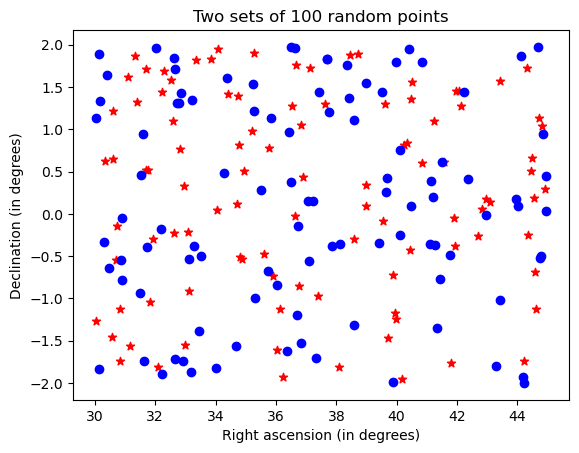

In [3]:
#Python task #2 populate with random points
num_points = 100 #TJ define number of stars for easier debugging
ra1_values = np.array(2. + random(num_points)) #TJ create random numbers between 2 and 3
d1_values = np.array((random(num_points)-0.5)*4.) #TJ create random numbers between -2 and +2
loc1 = SkyCoord(ra1_values,d1_values, unit = (u.hourangle,u.deg), frame = 'icrs')

ra2_values = np.array(2. + random(num_points)) #TJ do the same for another 100 points
d2_values = np.array((random(num_points)-0.5)*4.)
loc2 = SkyCoord(ra2_values,d2_values, unit = (u.hourangle,u.deg), frame = 'icrs')

plt.scatter(loc1.ra, loc1.dec, marker = "*", color = 'red')
plt.scatter(loc2.ra, loc2.dec, marker = "o", color = 'blue')
plt.xlabel('Right ascension (in degrees)')
plt.ylabel('Declination (in degrees)')
plt.title('Two sets of 100 random points')
plt.show()

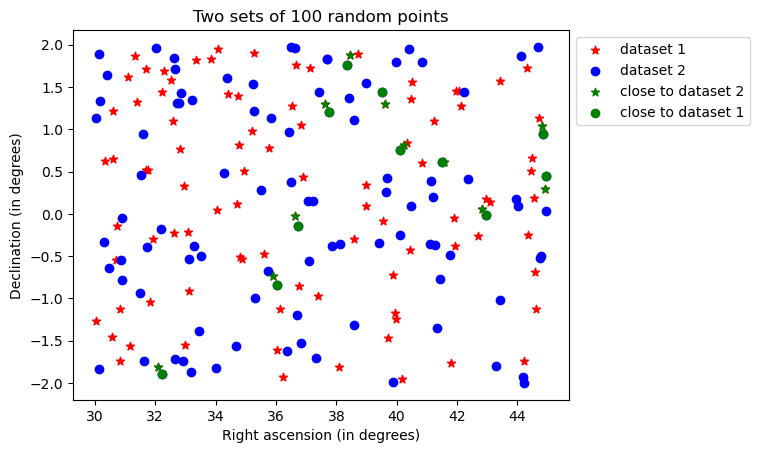

In [4]:
#Python task #3 find clustered points
search_radius = 10*u.arcmin
id1, id2, d2d, d3d = loc2.search_around_sky(loc1, search_radius)

plt.scatter(loc1.ra, loc1.dec, marker = "*", label = 'dataset 1', color = 'red')
plt.scatter(loc2.ra, loc2.dec, marker = "o", label = 'dataset 2', color = 'blue')
plt.scatter(loc1[id1].ra, loc1[id1].dec, marker = '*', label = 'close to dataset 2', color = 'green')
plt.scatter(loc2[id2].ra, loc2[id2].dec, marker = 'o', label = 'close to dataset 1', color = 'green')
plt.xlabel('Right ascension (in degrees)')
plt.ylabel('Declination (in degrees)')
plt.title('Two sets of 100 random points')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


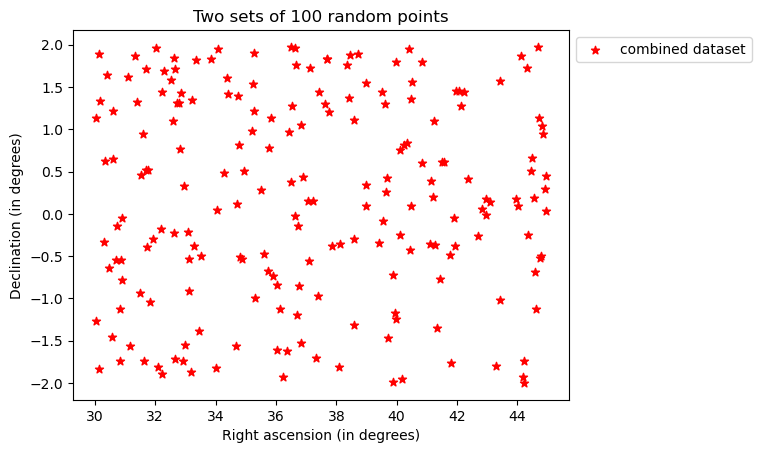

In [5]:
#Python task #4 combine arrays
ra = np.concatenate([loc1.ra, loc2.ra])
dec = np.concatenate([loc1.dec, loc2.dec])
plt.scatter(ra, dec, marker = '*', label = 'combined dataset', color = 'red')
plt.xlabel('Right ascension (in degrees)')
plt.ylabel('Declination (in degrees)')
plt.title('Two sets of 100 random points')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

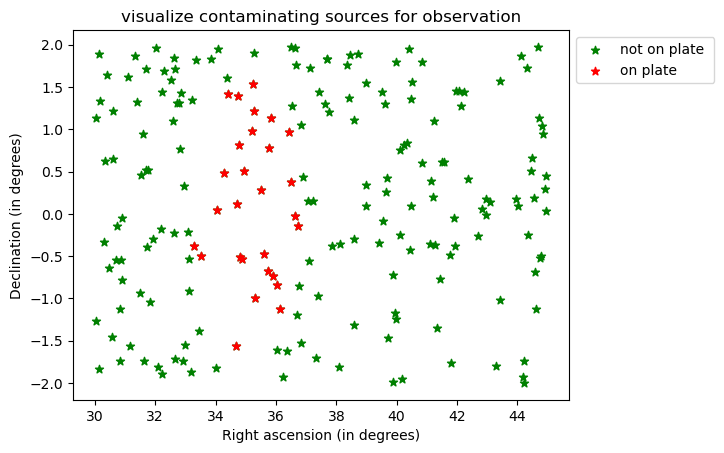

In [6]:
#Python task #5 find contaminates
all_stars = SkyCoord(ra,dec, frame = 'icrs')
obs_location = SkyCoord('2h20m5s', '-0d6m12s', unit = (u.hourangle, u.deg))
nearby = all_stars.separation(obs_location) < 1.8*u.degree

plt.scatter(all_stars.ra, all_stars.dec, marker = '*', label = 'not on plate ', color = 'green')
plt.scatter(all_stars[nearby].ra, all_stars[nearby].dec, marker = '*', label = 'on plate ', color = 'red')
plt.xlabel('Right ascension (in degrees)')
plt.ylabel('Declination (in degrees)')
plt.title('visualize contaminating sources for observation')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()